# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:37<00:00, 1118.25it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also

In [19]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 30026.65it/s]


## 1.5 Preparing data for models

In [20]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [21]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [22]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [23]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [24]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())
school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (109248, 51)


In [25]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())
teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
Shape of matrix after one hot encodig  (109248, 6)


In [26]:
vectorizer = CountVectorizer(lowercase=False,binary=True)
vectorizer.fit(project_data['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())
project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['12', 'Grades', 'PreK']
Shape of matrix after one hot encodig  (109248, 3)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [28]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [29]:
vectorizer = CountVectorizer(min_df=10)
text_bow_title = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",text_bow_title.shape)

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.5.2.2 TFIDF vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [31]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_title = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title.shape)

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [32]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [33]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:45<00:00, 2413.25it/s]


109248
300


In [34]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 43775.01it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [35]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [36]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [05:21<00:00, 339.72it/s]


109248
300


In [37]:
# Similarly you can vectorize for title also

In [38]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [39]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 23316.32it/s]


109248
300


### 1.5.3 Vectorizing Numerical features

In [40]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

__Normalizing the numerical features: Price__

In [41]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [42]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

__Normalizing the numerical features: quantity__

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 16.965610354422964, Standard deviation : 26.182821919093175


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [44]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [90]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((vec_essay,vec_title,vec_essay_title,school_state_one_hot, teacher_prefix_one_hot, project_grade_category_one_hot,sub_categories_one_hot,categories_one_hot,price_standardized,quantity_standardized,num_words_essay_standardized,num_words_title_standardized,tnoppp_standardized,project_data['compound_sent_score'].reshape(-1,1),project_data['positive_sent_score'].reshape(-1,1),project_data['negative_sent_score'].reshape(-1,1),project_data['neutral_sent_score'].reshape(-1,1)))
X.shape

(109248, 2808)

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [47]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [48]:
compound_score = []
neg_score = []
neu_score = []
pos_score = []

for i in tqdm(range(len(project_data['essay']))) :
    ss = sid.polarity_scores(preprocessed_essays[i])
    compound_score.append(ss['compound'])
    neu_score.append(ss['neu'])
    neg_score.append(ss['neg'])
    pos_score.append(ss['pos'])

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [04:49<00:00, 376.88it/s]


__ Computing Number of Words in preprocessed essays__

In [49]:
num_words_essay = []
for i in tqdm(range(len(project_data['essay']))) :
    string = preprocessed_essays[i]
    tokens = string.split()
    n_tokens = len(tokens)
    num_words_essay.append(n_tokens)

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 59769.35it/s]


__ Computing Number of Words in preprocessed Titles__

In [50]:
num_words_title = []
for i in tqdm(range(len(project_data['project_title']))) :
    string = preprocessed_title[i]
    tokens = string.split()
    n_tokens = len(tokens)
    num_words_title.append(n_tokens)

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 593877.59it/s]


__ Displaying all the features combined__

In [51]:
project_data['num_words_essay'] = num_words_essay
project_data['num_words_title'] = num_words_title
project_data['compound_sent_score'] = compound_score
project_data['positive_sent_score'] = pos_score
project_data['neutral_sent_score'] = neu_score
project_data['negative_sent_score'] = neg_score

In [52]:
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,price,quantity,num_words_essay,num_words_title,compound_sent_score,positive_sent_score,neutral_sent_score,negative_sent_score
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,ESL Literacy,My students are English learners that are work...,154.6,23,161,5,0.9694,0.144,0.844,0.012


__Normalizing the numerical features: num_words_essay ___

In [53]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

num_words_essay_scalar = StandardScaler()
num_words_essay_scalar.fit(project_data['num_words_essay'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_words_essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_words_essay_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
num_words_essay_standardized = num_words_essay_scalar.transform(project_data['num_words_essay'].values.reshape(-1, 1))

Mean : 151.40636899531341, Standard deviation : 38.98659397088369


__Normalizing the numerical features: number of words in title__

In [54]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

num_words_title_scalar = StandardScaler()
num_words_title_scalar.fit(project_data['num_words_title'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_words_title_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_words_title_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
num_words_title_standardized = num_words_title_scalar.transform(project_data['num_words_title'].values.reshape(-1, 1))

Mean : 4.334816198008202, Standard deviation : 1.7866924240888524


__Normalizing the numerical features: teacher_number_of_previously_posted_projects___

In [55]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

tnoppp_scalar = StandardScaler()
tnoppp_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {tnoppp_scalar.mean_[0]}, Standard deviation : {np.sqrt(tnoppp_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
tnoppp_standardized = tnoppp_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


# Assignment 11: TruncatedSVD

- <font color='red'>step 1</font> Select the top 2k words from essay text and project_title (concatinate essay text with project title and then find the top 2k words) based on their <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>`idf_`</a> values 
- <font color='red'>step 2</font> Compute the co-occurance matrix with these 2k words, with window size=5 (<a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>ref</a>)
    <img src='cooc.JPG' width=300px>
- <font color='red'>step 3</font> Use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on calculated co-occurance matrix and reduce its dimensions, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a>
 >- The shape of the matrix after TruncatedSVD will be 2000\*n, i.e. each row represents a vector form of the corresponding word. <br>
 >- Vectorize the essay text and project titles using these word vectors. (while vectorizing, do ignore all the words which are not in top 2k words)
- <font color='red'>step 4</font> Concatenate these truncatedSVD matrix, with the matrix with features
<ul>
    <li><strong>school_state</strong> : categorical data</li>
    <li><strong>clean_categories</strong> : categorical data</li>
    <li><strong>clean_subcategories</strong> : categorical data</li>
    <li><strong>project_grade_category</strong> :categorical data</li>
    <li><strong>teacher_prefix</strong> : categorical data</li>
    <li><strong>quantity</strong> : numerical data</li>
    <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
    <li><strong>price</strong> : numerical data</li>
    <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
    <li><strong>number of words in the title</strong> : numerical data</li>
    <li><strong>number of words in the combine essays</strong> : numerical data</li>
    <li><strong>word vectors calculated in</strong> <font color='red'>step 3</font> : numerical data</li>
</ul>
- <font color='red'>step 5</font>: Apply GBDT on matrix that was formed in <font color='red'>step 4</font> of this assignment, <font color='blue'><strong>DO REFER THIS BLOG: <a href='https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html'>XGBOOST DMATRIX<strong></a></font>
<li><font color='red'>step 6</font>:Hyper parameter tuning (Consider any two hyper parameters)<ul><li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>



In [0]:
import sys
import math
 
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

# you might need to install this one
import xgboost as xgb

class XGBoostClassifier():
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round, verbose_eval=1)
 
    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)[:,1]
        return roc_auc_score(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    

clf = XGBoostClassifier(eval_metric = 'auc', num_class = 2, nthread = 4,)
###################################################################
#               Change from here                                  #
###################################################################
parameters = {
    'num_boost_round': [100, 250, 500],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

clf = GridSearchCV(clf, parameters)
X = np.array([[1,2], [3,4], [2,1], [4,3], [1,0], [4,5]])
Y = np.array([0, 1, 0, 1, 0, 1])
clf.fit(X, Y)

# print(clf.grid_scores_)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

score: 0.8333333333333334
colsample_bytree: 0.9
eta: 0.05
max_depth: 6
num_boost_round: 100
subsample: 0.9


<h1>2. TruncatedSVD </h1>

<h2>2.1 Selecting top 2000 words from `essay` and `project_title`</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [56]:
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,price,quantity,num_words_essay,num_words_title,compound_sent_score,positive_sent_score,neutral_sent_score,negative_sent_score
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,ESL Literacy,My students are English learners that are work...,154.6,23,161,5,0.9694,0.144,0.844,0.012


__Concatenate essay and project_title features__

In [57]:
essay_title =[]
for i in range(len(preprocessed_essays)) :
    essay_title.append(preprocessed_title[i] +' '+preprocessed_essays[i])

In [58]:
essay_title[0]

'educational support english learners home my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help chil

__Find top 2k words based on idf score__

In [59]:
tfidf_vect = TfidfVectorizer(min_df=10)
essay_title_tfidf = tfidf_vect.fit_transform(essay_title)
print("Shape of matrix  ",essay_title_tfidf.shape)

Shape of matrix   (109248, 16976)


In [60]:
essay_title_tfidf[0]

<1x16976 sparse matrix of type '<class 'numpy.float64'>'
	with 114 stored elements in Compressed Sparse Row format>

In [61]:
## References : https://stackoverflow.com/questions/25217510/how-to-see-top-n-entries-of-term-document-matrix-after-tfidf-in-scikit-learn/25219535
indices = np.argsort(tfidf_vect.idf_)[::-1]
features = tfidf_vect.get_feature_names()
top_n = 2000
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['commission', 'beep', 'dreadful', 'fireworks', 'inheritance', 'photojournalism', 'ogden', 'firefighter', 'wan', 'fins', 'acceptances', 'inject', 'injuring', 'tinikling', 'uninhibited', 'bedrooms', 'accessorize', 'syracuse', 'crocodile', 'inoperable', 'reflector', 'inglewood', 'tabata', 'lily', 'tabletops', 'atrocities', 'depressing', 'wary', 'phillips', 'flatten', 'ensues', 'classtime', 'lighters', 'flashing', 'okc', 'belonged', 'infection', 'claws', 'inferential', 'cleans', 'rehabilitate', 'rehab', 'fitzgerald', 'cleverly', 'becuase', 'waits', 'sympathy', 'refinement', 'swimmers', 'fiddle', 'planetary', 'instructionally', 'almond', 'fewest', 'norman', 'methodically', 'cohorts', 'festivities', 'stinks', 'stinky', 'dictating', 'festive', 'coils', 'colin', 'collapsible', 'crashed', 'equitably', 'creepy', 'stills', 'crickets', 'thompson', 'lessened', 'stealing', 'symmetrical', 'reenergize', 'crisscross', 'stemm', 'pits', 'epidemics', 'recruitment', 'swish', 'recounted', 'fieldwork', 'ste

<h2>2.2 Computing Co-occurance matrix</h2>

In [58]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__Function to form Co-Occurence Matrix__  

In [62]:
## Reference : https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas
def form_coocur_mat(sample, n_neighbour, top_n_feat_names) :
    #coocur_mat = []
    coocur_mat = np.array([[0 for row in range(len(top_n_feat_names))] for column in range(len(top_n_feat_names))])
    coocur_df = pd.DataFrame(coocur_mat, index=top_n_feat_names, columns=top_n_feat_names)
    index = 0
    for sentence in sample :
        word_list = sentence.split(" ")
        index = index + 1
        #print(index)
        for row in range(len(word_list)) :
            if word_list[row] in top_n_feat_names :
                for col in range(1,n_neighbour+1) :
                    if (row + col) < len(word_list) and word_list[row+col] in top_n_feat_names :
                        if ((row + col) < len(word_list)) and (word_list[row] != word_list[row+col]) :
                            coocur_df.loc[word_list[row], word_list[row+col]] += 1 # If word i occurs in the proximity of word j add +1 to matrix.
                            coocur_df.loc[word_list[row+col], word_list[row]] += 1 # Same as above for word j
        # Get the progress of the execution 
        if index % 1000 == 0:
            print('Number of sentences whose processing have been completed = ',index)
    return coocur_df            
                
                

__Function to find the optimal no. of components based on explained variance using elbow-curve method__

In [63]:
from sklearn.decomposition import TruncatedSVD
def TruncatedSVD_n_comp(coocur_mat, k) :
    variance = []
    maxexp_var = -1
    svdmax = 0
    svdmax_list = []
    for component in k:
        t_svd = TruncatedSVD(n_components=component)
        t_svd.fit(coocur_mat)
        expsum = t_svd.explained_variance_ratio_.sum() # Calculate the explained variance ratio sum.
        variance.append(expsum)
        svdmax_list.append(t_svd)
    maxexp_var = max(variance)
    max_index = variance.index(maxexp_var)
    svdmax = svdmax_list[max_index]
    return svdmax, k, variance 

In [64]:
def plot_Cumulative_Variance(k , variance) :
    plt.figure(1,figsize = (7,5))
    plt.clf()
    plt.plot(k, variance)
    plt.scatter(k, variance)
    plt.axis('tight')
    plt.grid()
    plt.title("Variance Explained vs. Number of Components")
    plt.xlabel("Number of Components")
    plt.ylabel("Total Variance Explained in %")
    plt.show()

__Function to compute vectors U,Sigma and V Transpose__

In [65]:
## Reference :https://stackoverflow.com/questions/31523575/get-u-sigma-v-matrix-from-truncated-svd-in-scikit-learn
def compute_U_Sigma_VT(coocur_mat, svdmax):
    U = svdmax.transform(coocur_mat)
    Sigma_arr = np.array([[0 for x in range(svdmax.singular_values_.shape[0])] for x in range(svdmax.singular_values_.shape[0])])
    for i in range(svdmax.singular_values_.shape[0]):
        Sigma_arr[i, i] = svdmax.singular_values_[i]
    VT = svdmax.components_    
    Sigma = Sigma_arr
    return (U, Sigma, VT)

<h2>2.3 Applying TruncatedSVD and Calculating Vectors for `essay` and `project_title`</h2>

In [93]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [66]:
coocur_mat = form_coocur_mat(essay_title, 5, top_features)

Number of sentences whose processing have been completed =  1000
Number of sentences whose processing have been completed =  2000
Number of sentences whose processing have been completed =  3000
Number of sentences whose processing have been completed =  4000
Number of sentences whose processing have been completed =  5000
Number of sentences whose processing have been completed =  6000
Number of sentences whose processing have been completed =  7000
Number of sentences whose processing have been completed =  8000
Number of sentences whose processing have been completed =  9000
Number of sentences whose processing have been completed =  10000
Number of sentences whose processing have been completed =  11000
Number of sentences whose processing have been completed =  12000
Number of sentences whose processing have been completed =  13000
Number of sentences whose processing have been completed =  14000
Number of sentences whose processing have been completed =  15000
Number of sentences

In [67]:
coocur_mat.shape

(2000, 2000)

In [68]:
svdmax, optimal_comp, variance = TruncatedSVD_n_comp(coocur_mat, [500, 700, 900, 1100, 1300, 1500])

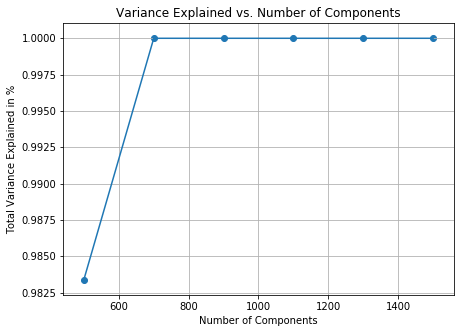

In [69]:
plot_Cumulative_Variance(optimal_comp , variance)

In [70]:
U,Sigma,VT = compute_U_Sigma_VT(coocur_mat, svdmax)
print(U.shape)
print(Sigma.shape)
print(VT.shape)

(2000, 900)
(900, 900)
(900, 2000)


In [72]:
## Reference :https://github.com/kuk/log-progress
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

__Calculate vectors of essay__

After decreasing the dimensions of word vectors using Truncated SVD, you can vectorize essay text by taking the mean to all the word vectors of important words in each essay.

For example, an essay has three important words then you can represent that essay as a mean to the word vectors of those three words.


In [73]:
vector =np.zeros(900)
vec_essay = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(len(preprocessed_essays))) :
    e = preprocessed_essays[i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay.append(vector.tolist())        
    vector = np.zeros(900)

A Jupyter Widget

__Calculate vectors of project_title__

In [88]:
vector =np.zeros(900)
vec_title = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(len(preprocessed_title))) :
    e = preprocessed_title[i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_title.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

__Calculate vectors for feature essay and project_title after concatenation__

In [89]:
vector =np.zeros(900)
vec_essay_title = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(len(essay_title))) :
    e = essay_title[i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay_title.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

In [87]:
vect_title = TfidfVectorizer(vocabulary = top_features,min_df = 10)
title_tfidf = vect_title.fit_transform(preprocessed_title)
print("Shape of matrix  ",title_tfidf.shape)

Shape of matrix   (109248, 2000)


In [88]:
vect_esstitle = TfidfVectorizer(vocabulary = top_features,min_df = 10)
esstitle_tfidf = vect_esstitle.fit_transform(essay_title)
print("Shape of matrix  ",esstitle_tfidf.shape)

Shape of matrix   (218496, 2000)


<h2>2.4 Merge the features from <font color='red'>step 3</font> and <font color='red'>step 4</font></h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [91]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,price,quantity,num_words_essay,num_words_title,compound_sent_score,positive_sent_score,neutral_sent_score,negative_sent_score
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,ESL Literacy,My students are English learners that are work...,154.6,23,161,5,0.9694,0.144,0.844,0.012


In [92]:
X = project_data

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

__one hot encoding the catogorical features: school state__

In [94]:
# One hot encoding of school state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


__one hot encoding the catogorical features: teacher_prefix__

In [95]:
# One hot encoding of 
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 6) (49041,)
(24155, 6) (24155,)
(36052, 6) (36052,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


__one hot encoding the catogorical features: project_grade_category__

In [96]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values.astype('U'))
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values.astype('U'))
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values.astype('U'))

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 3) (49041,)
(24155, 3) (24155,)
(36052, 3) (36052,)
['12', 'grades', 'prek']


__one hot encoding the catogorical features: clean_categories__

In [97]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values.astype('U'))
X_cv_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values.astype('U'))
X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values.astype('U'))

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_cv_cat_ohe.shape, y_cv.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


__one hot encoding the catogorical features: clean_subcategories__

In [98]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values.astype('U'))
X_cv_subcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values.astype('U'))
X_test_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values.astype('U'))

print("After vectorizations")
print(X_train_subcat_ohe.shape, y_train.shape)
print(X_cv_subcat_ohe.shape, y_cv.shape)
print(X_test_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


__Normalizing the numerical features: Price__

In [99]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__Normalizing the numerical features: quantity__

In [100]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__Normalizing the numerical features: num_words_essay ___

In [101]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['num_words_essay'].values.reshape(-1,1))

X_train_nowe_norm = normalizer.transform(X_train['num_words_essay'].values.reshape(-1,1))
X_cv_nowe_norm = normalizer.transform(X_cv['num_words_essay'].values.reshape(-1,1))
X_test_nowe_norm = normalizer.transform(X_test['num_words_essay'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_nowe_norm.shape, y_train.shape)
print(X_cv_nowe_norm.shape, y_cv.shape)
print(X_test_nowe_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__Normalizing the numerical features: number of words in title__

In [102]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['num_words_title'].values.reshape(-1,1))

X_train_nowt_norm = normalizer.transform(X_train['num_words_title'].values.reshape(-1,1))
X_cv_nowt_norm = normalizer.transform(X_cv['num_words_title'].values.reshape(-1,1))
X_test_nowt_norm = normalizer.transform(X_test['num_words_title'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_nowt_norm.shape, y_train.shape)
print(X_cv_nowt_norm.shape, y_cv.shape)
print(X_test_nowt_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__Normalizing the numerical features: teacher_number_of_previously_posted_projects___

In [103]:

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tnoppp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_tnoppp_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnoppp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnoppp_norm.shape, y_train.shape)
print(X_cv_tnoppp_norm.shape, y_cv.shape)
print(X_test_tnoppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__Splitting Sentiment Scores__

In [104]:
X_train_cos = X_train['compound_sent_score'].values.reshape(-1,1)
X_cv_cos = X_cv['compound_sent_score'].values.reshape(-1,1)
X_test_cos = X_test['compound_sent_score'].values.reshape(-1,1)

In [105]:
X_train_pos = X_train['positive_sent_score'].values.reshape(-1,1)
X_cv_pos = X_cv['positive_sent_score'].values.reshape(-1,1)
X_test_pos = X_test['positive_sent_score'].values.reshape(-1,1)

In [106]:
X_train_neg = X_train['negative_sent_score'].values.reshape(-1,1)
X_cv_neg = X_cv['negative_sent_score'].values.reshape(-1,1)
X_test_neg = X_test['negative_sent_score'].values.reshape(-1,1)

In [107]:
X_train_neu = X_train['neutral_sent_score'].values.reshape(-1,1)
X_cv_neu = X_cv['neutral_sent_score'].values.reshape(-1,1)
X_test_neu = X_test['neutral_sent_score'].values.reshape(-1,1)

__Calculate vectors of essay and project_title after concatenation for Train data__

In [109]:
vector =np.zeros(900)
vec_essay_title_train = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(49041)) :
    e = essay_title[i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay_title_train.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

In [114]:
len(vec_essay_title_train)

49041

__Calculate vectors of essay and project_title after concatenation for CV data__

In [110]:
vector =np.zeros(900)
vec_essay_title_cv = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(24155)) :
    e = essay_title[49041+i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay_title_cv.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

In [116]:
len(vec_essay_title_cv)

24155

__Calculate vectors of essay and project_title after concatenation for Test data__

In [111]:
vector =np.zeros(900)
vec_essay_title_test = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(36052)) :
    e = essay_title[49041+24155+i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay_title_test.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

In [118]:
len(vec_essay_title_test)

36052

__Calculate vectors of essay for Train data__

In [112]:
vector =np.zeros(900)
vec_essay_train = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(49041)) :
    e = preprocessed_essays[i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay_train.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

__Calculate vectors of essay CV data__

In [113]:
vector =np.zeros(900)
vec_essay_cv = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(24155)) :
    e = preprocessed_essays[49041+i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay_cv.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

__Calculate vectors of essay Test data__

In [114]:
vector =np.zeros(900)
vec_essay_test = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(36052)) :
    e = preprocessed_essays[49041+24155+i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_essay_test.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

__Calculate vectors of title Train data__

In [115]:
vector =np.zeros(900)
vec_title_train = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(49041)) :
    e = preprocessed_title[i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_title_train.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

__Calculate vectors of title CV data__

In [116]:
vector =np.zeros(900)
vec_title_cv = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(24155)) :
    e = preprocessed_title[49041+i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_title_cv.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

__Calculate vectors of title Test data__

In [117]:
vector =np.zeros(900)
vec_title_test = []
cnt = 0
row_of_words = coocur_mat.index.values.tolist()
for i in log_progress(range(36052)) :
    e = preprocessed_title[49041+24155+i]
    cnt = 0
    for word in e.split() :
        if word in top_features :
            ind = row_of_words.index(word)
            vector+=U[ind]
            cnt+=1
    if cnt!=0 :
        vector = vector / cnt
    #print
    vec_title_test.append(vector)        
    vector = np.zeros(900)

A Jupyter Widget

__Merging all the features for Train, CV and Test data__

In [118]:
from scipy.sparse import hstack
X_tr = hstack((vec_essay_title_train,vec_title_train,vec_essay_train ,X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_quantity_norm,X_train_nowe_norm,X_train_nowt_norm,X_train_tnoppp_norm,X_train_cos,X_train_pos,X_train_neg,X_train_neu )).tocsr()
X_cr = hstack((vec_essay_title_cv,vec_title_cv,vec_essay_cv,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_quantity_norm,X_cv_nowe_norm,X_cv_nowt_norm,X_cv_tnoppp_norm,X_cv_cos,X_cv_pos,X_cv_neg,X_cv_neu)).tocsr()
X_te = hstack((vec_essay_title_test,vec_title_test,vec_essay_test,X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_quantity_norm,X_test_nowe_norm,X_test_nowt_norm,X_test_tnoppp_norm,X_test_cos,X_test_pos,X_test_neg,X_test_neu)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 2769) (49041,)
(24155, 2769) (24155,)
(36052, 2769) (36052,)


<h2>2.5 Apply XGBoost on the Final Features from the above section</h2>

https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [0]:
# No need to split the data into train and test(cv)
# use the Dmatrix and apply xgboost on the whole data
# please check the Quora case study notebook as reference

# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [156]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,ratio = 1)
X_tr1,y_train1 = sm.fit_sample(X_tr,y_train)
X_cr1,y_cv1 = sm.fit_sample(X_cr,y_cv)
X_te1,y_test1 = sm.fit_sample(X_te,y_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning:

Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning:

Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning:

Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.



__Hyperparameter Tunning to find the best hyperparameters__

In [133]:
import sys
import math
 
import numpy as np
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# you might need to install this one
import xgboost as xgb

class XGBoostClassifier():
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round, verbose_eval=1)
 
    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)[:,1]
        return roc_auc_score(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    

clf = XGBoostClassifier(eval_metric = 'auc', num_class = 2, nthread = 4,)
###################################################################
#               Change from here                                  #
###################################################################
parameters = {
        'max_depth': [ 2, 4, 6, 8, 10],
        'n_estimators':list(range(1,200,40))    
}

clf = GridSearchCV(clf, parameters,verbose = 100)
clf.fit(X_tr1, y_train1)

#print(clf.grid_scores_)
print('BEST HYPERPARAMETERS AND SCORE ARE')
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] max_depth=2, n_estimators=1 .....................................
[CV]  max_depth=2, n_estimators=1, score=0.5761913938340538, total=   5.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV]  max_depth=2, n_estimators=1, score=0.5670678894095297, total=   6.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.3s remaining:    0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV]  max_depth=2, n_estimators=1, score=0.5638618852163895, total=   6.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.7s remaining:    0.0s
[CV] max_depth=2, n_estimators=41 ....................................
[CV]  max_depth=2, n_estimators=41, score=0.5761913938340538, total=   5.7s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.1s remaining:    0.0s
[CV] max_depth=2, n_estimators=41 

[CV] max_depth=6, n_estimators=81 ....................................
[CV]  max_depth=6, n_estimators=81, score=0.5668918016171823, total=  12.7s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  6.8min remaining:    0.0s
[CV] max_depth=6, n_estimators=81 ....................................
[CV]  max_depth=6, n_estimators=81, score=0.5671397156732483, total=  12.8s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  7.0min remaining:    0.0s
[CV] max_depth=6, n_estimators=81 ....................................
[CV]  max_depth=6, n_estimators=81, score=0.559313895958143, total=  12.9s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  7.2min remaining:    0.0s
[CV] max_depth=6, n_estimators=121 ...................................
[CV]  max_depth=6, n_estimators=121, score=0.5668918016171823, total=  12.7s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.5min remaining:    0.0s
[CV] max_depth=6, n_estimators=121 ...................................
[CV]  max_depth=6, n_

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



score: 0.569090684188286
max_depth: 4
n_estimators: 1


In [136]:
## Reference : https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

[[0.58520141 0.58520141 0.58520141 0.58520141 0.58520141]
 [0.61970067 0.61970067 0.61970067 0.61970067 0.61970067]
 [0.65167021 0.65167021 0.65167021 0.65167021 0.65167021]
 [0.6988782  0.6988782  0.6988782  0.6988782  0.6988782 ]
 [0.76129837 0.76129837 0.76129837 0.76129837 0.76129837]]


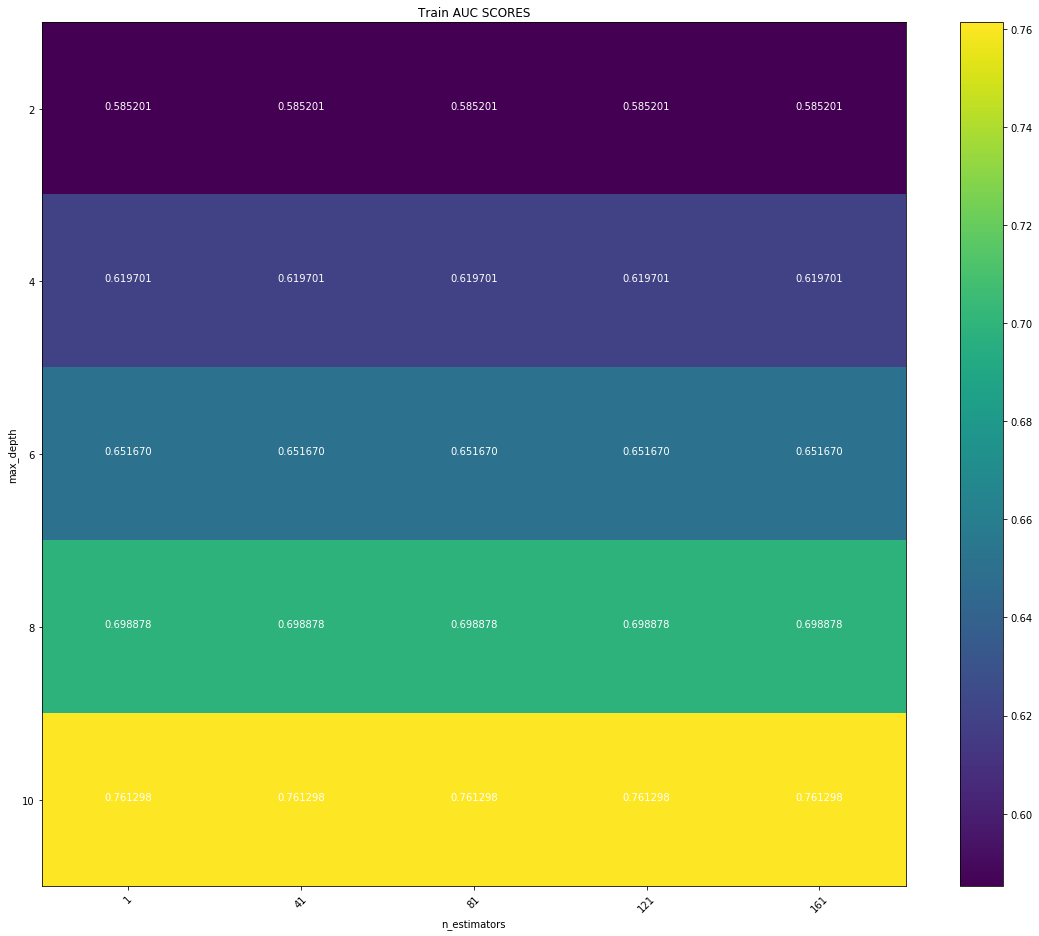

In [152]:
## Reference : https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
depth = [2, 4, 6, 8, 10]
est = list(range(1,200,40))

scores = clf.cv_results_['mean_train_score'].reshape(len(est),
                                                     len(depth))
print(scores)

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
import itertools
plt.figure(figsize=(20, 15))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(np.array(scores), interpolation='nearest')
cm = np.array(scores)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(est)), est, rotation=45)
plt.yticks(np.arange(len(depth)), depth)
fmt = 'f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white")
plt.title('Train AUC SCORES')
plt.show()

[[0.56904039 0.56904039 0.56904039 0.56904039 0.56904039]
 [0.56909068 0.56909068 0.56909068 0.56909068 0.56909068]
 [0.56444847 0.56444847 0.56444847 0.56444847 0.56444847]
 [0.56160557 0.56160557 0.56160557 0.56160557 0.56160557]
 [0.55521432 0.55521432 0.55521432 0.55521432 0.55521432]]


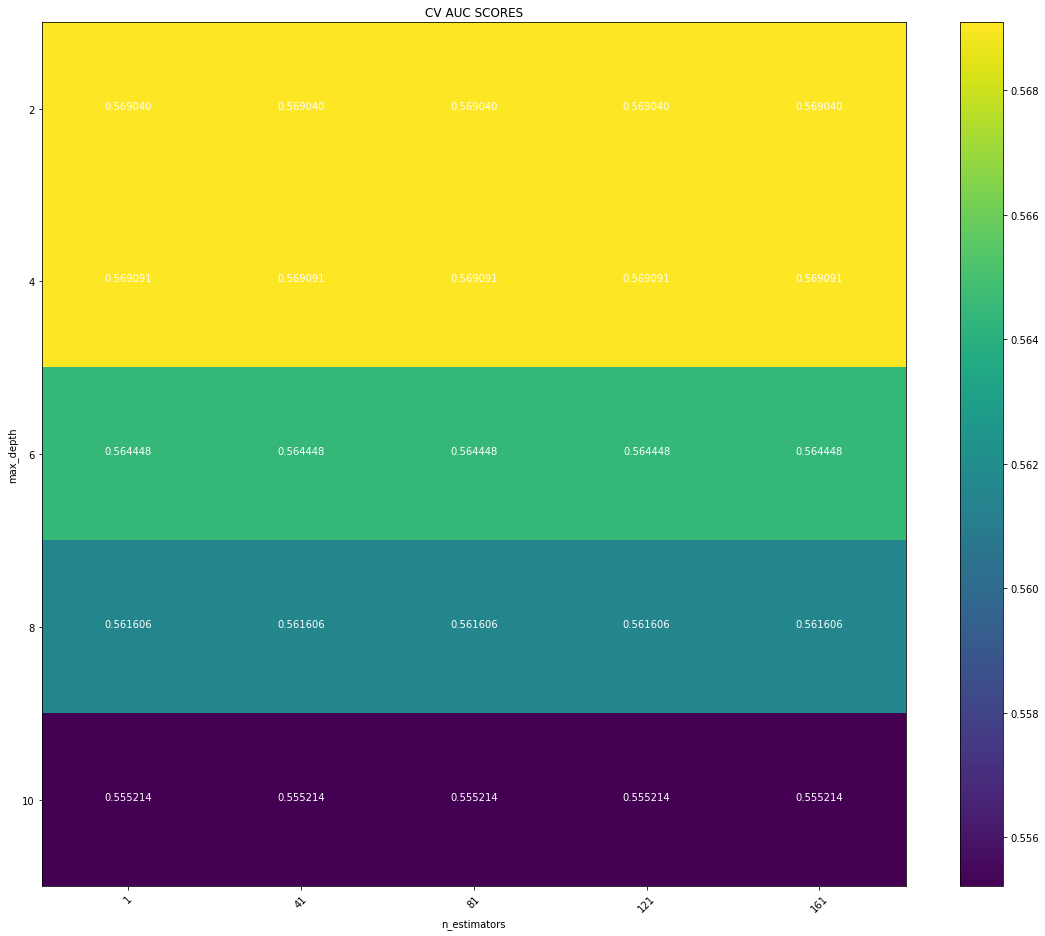

In [151]:
## Reference : https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
depth = [2, 4, 6, 8, 10]
est = list(range(1,200,40))

scores = clf.cv_results_['mean_test_score'].reshape(len(est),
                                                     len(depth))
print(scores)

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
import itertools
plt.figure(figsize=(20, 15))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(np.array(scores), interpolation='nearest')
cm = np.array(scores)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(est)), est, rotation=45)
plt.yticks(np.arange(len(depth)), depth)
fmt = 'f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white")
plt.title('CV AUC SCORES')
plt.show()

__Creation of the model with the best hyperparameter and Evaluation of the model__

In [97]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [116]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return t,predictions

In [158]:
## Reference : From Quora Question Pair Similarity Case Study
params = {}
params['eval_metric'] = 'auc'
params['n_estimators'] = 1
params['max_depth'] = 4

d_train = xgb.DMatrix(X_tr1, label=y_train1)
d_test = xgb.DMatrix(X_te1, label=y_test1)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_tr1,y_train1)
predict_y = bst.predict_proba(d_test)

print("The test auc score is:",roc_auc_score(y_test1, predict_y))

[0]	train-auc:0.564863	valid-auc:0.569723
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[10]	train-auc:0.702882	valid-auc:0.693766
[20]	train-auc:0.742397	valid-auc:0.727442
[30]	train-auc:0.766575	valid-auc:0.749133
[40]	train-auc:0.786918	valid-auc:0.767623
[50]	train-auc:0.805832	valid-auc:0.784758
[60]	train-auc:0.820638	valid-auc:0.797427
[70]	train-auc:0.835083	valid-auc:0.812131
[80]	train-auc:0.86359	valid-auc:0.841114
[90]	train-auc:0.87633	valid-auc:0.853169
[100]	train-auc:0.88092	valid-auc:0.857611
[110]	train-auc:0.903953	valid-auc:0.883299
[120]	train-auc:0.906758	valid-auc:0.88527
[130]	train-auc:0.909568	valid-auc:0.88798
[140]	train-auc:0.915978	valid-auc:0.894504
[150]	train-auc:0.918648	valid-auc:0.896877
[160]	train-auc:0.919861	valid-auc:0.897998
[170]	train-auc:0.923008	valid-auc:0.90079
[180]	train-auc:0.924343	valid-auc:0.901661
[190]	train-auc:0.926376	valid-auc:0.9

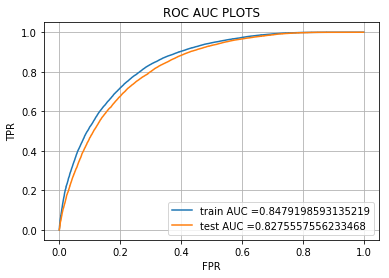

In [154]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf=xgb.XGBClassifier(max_depth = 4,n_estimators = 1,class_weight = 'balanced')#,min_samples_leaf = samples_leaf)
clf.fit(X_tr1, y_train1)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr1, y_train1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr1)    
y_test_pred = batch_predict(sig_clf, X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train1, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test1, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC PLOTS")
plt.grid()
plt.show()

In [164]:
## Reference : From Quora Question Pair Similarity Case Study
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(strin, test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title(strin + " Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title(strin +" Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title(strin +" Recall matrix")
    
    plt.show()

__Evaluation of the Model__

Total number of data points : 83230


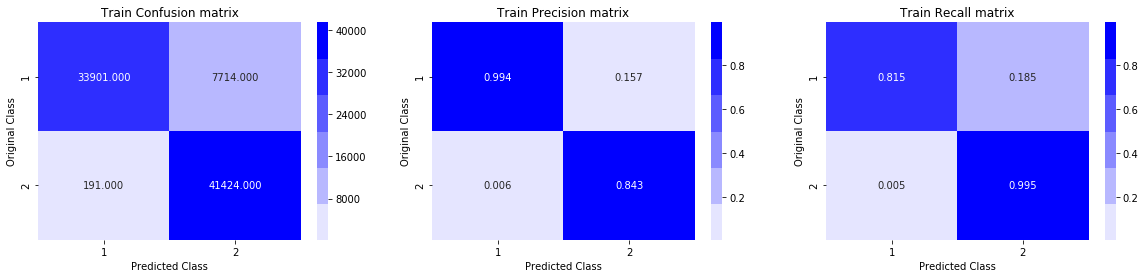

In [166]:
## Reference : From Quora Question Pair Similarity Case Study
predict_y_tr = bst.predict_proba(d_train)
predicted_y_tr =np.array(predict_y_tr>tr_thresholds,dtype=int)
print("Total number of data points :", len(predicted_y_tr))
plot_confusion_matrix('Train',y_train1, predicted_y_tr)

Total number of data points : 61186


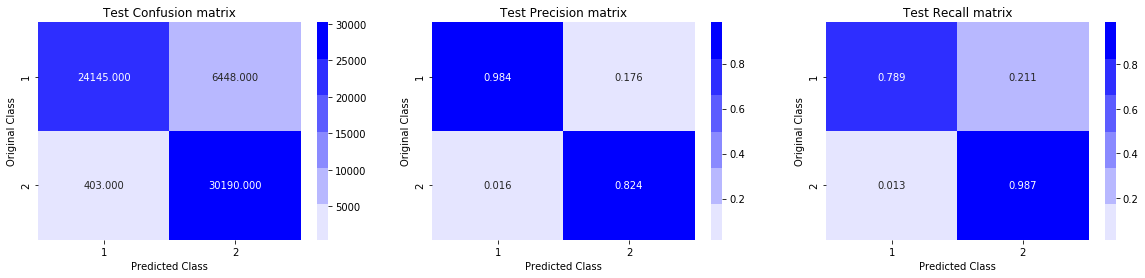

In [165]:
## Reference : From Quora Question Pair Similarity Case Study
predicted_y =np.array(predict_y>te_thresholds,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix('Test',y_test1, predicted_y)

<h1>3. Conclusion</h1>

In [0]:
# Please write down few lines about what you observed from this assignment. 

### Inference

1) Here we have first used TruncatedSVD for dimensionality reduction with reduced execution speed.The Matrix Factorization is both memory and computation intensive.<br>

2) We have merged all the features and applied XGBoost on the merged features. From the confusion matrices we can infer that the we have received a very good XGBoost Model with **Test AUC Score = 0.913**. 


## Steps Followed

1) First we concatenate the essay and project_title feature from the dataset.<br> 
1) We find the top '2K' words or features from the dataset based on the tf-idf score. <br>
3) We form the 'nxn' co-occurence matrix by using the 5 contextual words present in the neighbourhood of the reference word. We may change the window-size from 5 to any other number according to requirement.<br>
4) We find the optimal number of components by using the variance explained.<br>
5) We compute the various matrices 'U' of 'nxd', 'Sigma' of 'dxd' and 'VT' of 'dxn' using Matrix Factorization.<br>
6) So we get a new U with reduced dimensions by applying TruncatedSVD.<br>
7) We then merge various features as mentioned in the instructions.<br>
8) Now we hypertune the XGBoost hyperparameters using  GridSearchCV to find the best hyperparameters.<br>
9) Now we create the XGBoost model with the best hyperparameters.<br>
10) Evaluate the performance of the model from Train and Test confusion, recall and precision matrices.